<a href="https://colab.research.google.com/github/parikshitraghav07/Projects/blob/main/Ols_maruti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Define the ticker symbol
ticker = 'MARUTI.NS'

# Fetch historical stock data
data = yf.download(ticker, start='2015-01-01', end='2023-06-01')

# Display the first few rows of the dataframe
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,3320.25,3360.000000,3320.250000,3340.750000,3093.800537,299232
2015-01-02,3360.00,3383.000000,3350.500000,3359.600098,3111.256836,233924
2015-01-05,3382.00,3469.350098,3376.050049,3447.800049,3192.937256,536747
2015-01-06,3439.00,3439.000000,3382.500000,3395.250000,3144.271973,422743
2015-01-07,3400.00,3458.949951,3382.050049,3437.750000,3183.630371,369241


In [ ]:
# Use the closing prices
data['Close'] = data['Adj Close']
data = data.drop(columns=['Adj Close'])

# Create a lagged version of the closing prices to use as a predictor
data['Lag1'] = data['Close'].shift(1)
data = data.dropna()

# Define the feature set (X) and target variable (y)
X = data['Lag1']
y = data['Close']

# Add a constant to the feature set (required for OLS)
X = sm.add_constant(X)

In [ ]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.787e+05
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:14:22   Log-Likelihood:                -12749.
No. Observations:                2076   AIC:                         2.550e+04
Df Residuals:                    2074   BIC:                         2.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9379      9.668      1.959      0.0

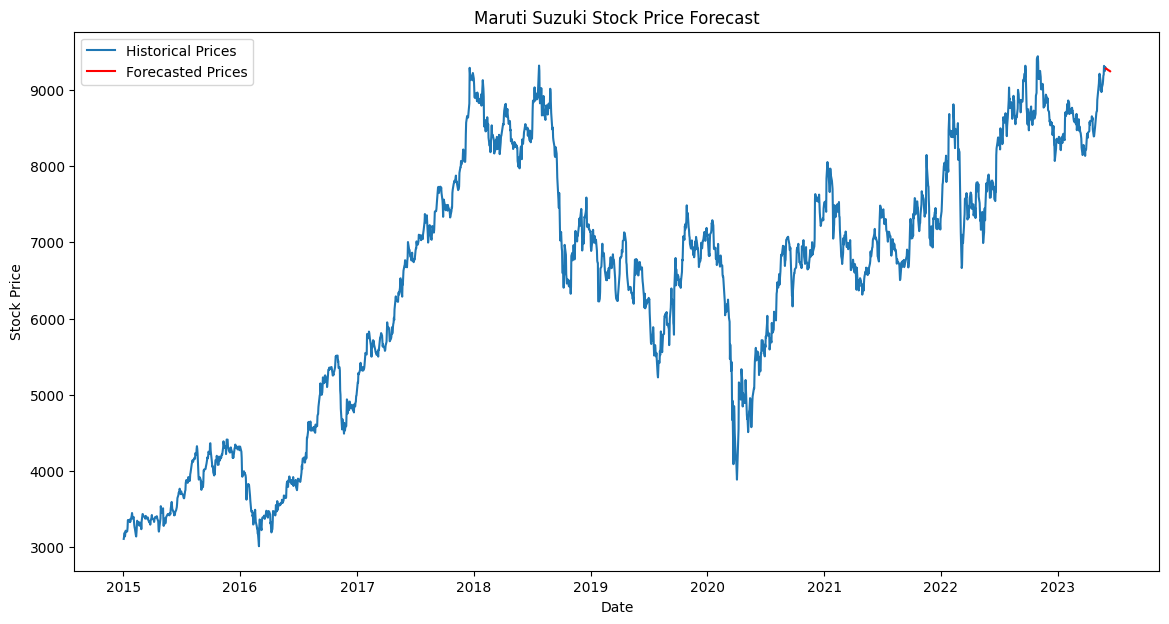

In [ ]:
# Predict the next 10 days
forecast_period = 10
last_close = data['Close'].iloc[-1]
predictions = []

for i in range(forecast_period):
    last_close = model.predict([1, last_close])[0]
    predictions.append(last_close)

# Create a DataFrame to hold the predictions
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='B')
forecast_df = pd.DataFrame({'Forecast': predictions}, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Prices')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Maruti Suzuki Stock Price Forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df

,Forecast
2023-06-01,9276.462471
2023-06-02,9272.567365
2023-06-05,9268.681847
2023-06-06,9264.805892
2023-06-07,9260.939478
2023-06-08,9257.082580
2023-06-09,9253.235176
2023-06-12,9249.397242
2023-06-13,9245.568754
2023-06-14,9241.749690
